In [1]:
import os
import sys
import urllib.request
import json
import re
import pandas as pd
client_id = "4FdY0qL5azIJ4BXVjUal"
client_secret = "Ylgg4Oh_FN"
search = input('검색어를 입력하세요 : ')

blog_data = pd.DataFrame()

encText = urllib.parse.quote(search)

title = list()
description = list()
adress = list()

for i in range(1, 1000, 100):
    try:
        url = "https://openapi.naver.com/v1/search/blog?query=" + encText + '&display=100'+'&sort=sim'+f'&start={i}' # json 결과
        # url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과

        request = urllib.request.Request(url)
        request.add_header("X-Naver-Client-Id",client_id)
        request.add_header("X-Naver-Client-Secret",client_secret)
        response = urllib.request.urlopen(request)
        rescode = response.getcode()

        if(rescode==200):
            response_body = response.read().decode('utf-8')
            response_body1 = json.loads(str(response_body))
            for i in response_body1['items']:
                hangul = re.compile('[^ ㄱ-ㅎ|가-힣]+')
                title.append(hangul.sub(r'', i['title']))
                description.append(hangul.sub(r'', i['description']))
                adress.append(i['link'])
        else:
            print("Error Code:" + rescode)

    except:
        print('Error')

blog_data['title'] = title
blog_data['description']= description
blog_data['adress'] = adress

blog_data.to_csv('data/{0}블로그 데이터.txt'.format(search), mode='a', header=True, index=True)



검색어를 입력하세요 : 커피


In [4]:
import os
import sys
import urllib.request
import json
import re
import pandas as pd

In [70]:
import konlpy
import pandas as pd
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def get_tags(text, ntags=50): #상위 50개 출력
    spliter = Okt()
    nouns = spliter.nouns(text)
    count = Counter(nouns)
    return dict(count.most_common(ntags))

def clean_str(s):
    hangul = re.compile('[^ㄱ-ㅎ|가-힣]+')
    s = hangul.sub(r' ',s)
    cp = re.compile('['
                    u'\U00010000-\U0010FFFF'
                   ']+', flags=re.UNICODE
                   )
    s = cp.sub(r'', s)
    return s.strip()

def Wordcloud(data, savename, maskname=''):
    if maskname == '':
        wc = WordCloud(font_path='font/BMDOHYEON_ttf.ttf', background_color='white', max_font_size=60, colormap='copper')
    else:
        maskimg = np.array(Image.open(maskname))
        for i in range(len(maskimg)):
            for j in range(len(maskimg[i])):
                if maskimg[i][j]== 0:
                    maskimg[i][j] = 255
        wc = WordCloud(font_path='font/BMDOHYEON_ttf.ttf', background_color='white', mask=maskimg, max_font_size=60, colormap='copper')
    wc.generate_from_frequencies(data)
    plt.figure(figsize=(10,10))
    plt.imshow(wc)
    plt.tight_layout(pad=0)
    plt.axis('off')
    plt.show()
#     wc.to_file(savename + ".png")


data = '''
오늘(13일) 0시 기준 국내 코로나19 신규 확진자는 1,433명입니다. 하루 1,000명 넘는 네자릿수 확진자는 벌써 69일째 이어지고 있습니다.

신규 확진자 가운데 국내 발생 환자는 1,409명입니다. 지역별로 보면 수도권 확진자가 1,100명으로 78.1%를, 비수도권이 309명으로 21.9%를 차지했습니다.

시도별로는 서울 554명, 경기 395명, 인천 151명, 충남 58명, 대전 39명, 부산 35명, 충북 33명, 대구 31명, 경북 25명, 경남 21명, 울산 17명, 광주 14명, 강원 13명, 전북 10명, 전남 5명, 세종·제주 각 4명입니다.

해외 유입 환자는 24명입니다. 입국 시 검역 단계에서 10명, 입국 후 자가 격리 중에 14명이 확진 판정을 받았습니다.

위중증 환자는 9명 줄어 342명이고, 사망자는 1명 늘어 누적 2,360명(치명률 0.86%)입니다.

어제 코로나19 백신 신규 1차 접종자는 2만 1,645명으로 누적 1차 접종자는 3,315만 2,722명입니다.

신규 접종 완료자는 2만 5,443명으로, 지금까지 2,006만 1,878명이 접종을 완료했습니다.

인구 대비 1차 접종 비율은 64.6%, 접종 완료 비율은 39.1%입니다.
'''


print(get_tags(clean_str(data)))

{'명': 32, '접종': 6, '신규': 4, '확': 4, '진자': 4, '만': 4, '환자': 3, '차': 3, '완료': 3, '일': 2, '시': 2, '국내': 2, '코로나': 2, '수도권': 2, '를': 2, '입국': 2, '누적': 2, '비율': 2, '오늘': 1, '기준': 1, '하루': 1, '자릿수': 1, '벌써': 1, '가운데': 1, '발생': 1, '지역별': 1, '비': 1, '차지': 1, '시도': 1, '별로': 1, '서울': 1, '경기': 1, '인천': 1, '충남': 1, '대전': 1, '부산': 1, '충북': 1, '대구': 1, '경북': 1, '경남': 1, '울산': 1, '광주': 1, '강원': 1, '전북': 1, '전남': 1, '세종': 1, '제주': 1, '각': 1, '해외': 1, '유입': 1}


In [18]:

df = pd.read_csv('data/커피블로그 데이터.txt')
df

,Unnamed: 0,title,description,adress
0,0,강릉 중앙시장 선물 커피빵 엄지척,강릉 중앙시장 선물 커피빵 엄지척 며칠 전 친구가 아이들을 데리고 강릉에 간다길래 ...,https://blog.naver.com/woaiheejun?Redirect=Log...
1,1,커피그라인더 손쉽게 원두 갈기,저는 매일 마다 커피를 마시고 있는데 에스프레소 머신을 사용할 때에는 전동을 사용해...,https://blog.naver.com/totos1207?Redirect=Log&...
2,2,제주도 구좌읍 카페 풍림다방 커피보다 쇼콜라쇼,제주도 구좌읍 카페 풍림다방 올해 봄 제주도 여행을 갔다가 예전에 맛있게 마셨던 풍...,https://blog.naver.com/wlsgml850?Redirect=Log&...
3,3,가정용커피머신기 드립캡슐 라이녹스,가정용커피머신기 라이녹스 현대인답게 하루에 보통 잔의 커피를 마시고 있다 그렇다 보...,https://blog.naver.com/lubkhaki?Redirect=Log&l...
4,4,풍미깊었던 제주도 커피 맛집,얼마 전 친구와 제주도로 놀러 갔다가 에서 유명세를 탄 제주도 커피 맛집을 찾았다 ...,https://blog.naver.com/hloveh01?Redirect=Log&l...
...,...,...,...,...
995,995,구성커피로스터스 용인 보정동 논뷰 카페 라떼맛집,구성커피로스터스 용인 보정동 논뷰 카페 라떼맛집 며칠동안 커피를 못 먹은 관계로 카...,https://blog.naver.com/duboo23?Redirect=Log&lo...
996,996,자연적으로 분해되는 캡슐 커피 브랜드 커피용헌,윤리적이고 친환경적인 방식으로 캡슐 커피를 즐기는 법 일상의 휴식과도 같은 커피 브...,https://blog.naver.com/designpress2016?Redirec...
997,997,핸드드립 커피에 인스타 감성까지 이룸커피프로젝트,핸드드립 커피에 인스타 감성까지 불광동 카페 이룸커피프로젝트 은평구 소셜미디어 서...,https://blog.naver.com/eunpyeonggu?Redirect=Lo...
998,998,클롸드가 아끼는 카페 네임드 에스프레소 리이케 커피,로스팅도 직접 하시는데 커피 콩 종류가 한 개 정도 하이퀄러티 스페셜티만 사용하신다...,https://blog.naver.com/sharkskins?Redirect=Log...


In [19]:
df1 = df[['description']]

In [20]:
df1

,description
0,강릉 중앙시장 선물 커피빵 엄지척 며칠 전 친구가 아이들을 데리고 강릉에 간다길래 ...
1,저는 매일 마다 커피를 마시고 있는데 에스프레소 머신을 사용할 때에는 전동을 사용해...
2,제주도 구좌읍 카페 풍림다방 올해 봄 제주도 여행을 갔다가 예전에 맛있게 마셨던 풍...
3,가정용커피머신기 라이녹스 현대인답게 하루에 보통 잔의 커피를 마시고 있다 그렇다 보...
4,얼마 전 친구와 제주도로 놀러 갔다가 에서 유명세를 탄 제주도 커피 맛집을 찾았다 ...
...,...
995,구성커피로스터스 용인 보정동 논뷰 카페 라떼맛집 며칠동안 커피를 못 먹은 관계로 카...
996,윤리적이고 친환경적인 방식으로 캡슐 커피를 즐기는 법 일상의 휴식과도 같은 커피 브...
997,핸드드립 커피에 인스타 감성까지 불광동 카페 이룸커피프로젝트 은평구 소셜미디어 서...
998,로스팅도 직접 하시는데 커피 콩 종류가 한 개 정도 하이퀄러티 스페셜티만 사용하신다...


In [12]:
print(clean_str(textdata))

강릉 중앙시장 선물 커피빵 엄지척 며칠 전 친구가 아이들을 데리고 강릉에 간다길래 오랜만에 옆쪽에는 커피빵을 파는 강릉당이 있었답니다 민트색의 간판에 카페에서 봤음직한 조명이 장착되어있어 저는 매일 마다 커피를 마시고 있는데 에스프레소 머신을 사용할 때에는 전동을 사용해서 원두를 갈지만 핸드드립이나 에어로 프레스를 사용해서 내릴 때에는 손으로 직접 커피그라인더를 사용해서 수동으로 제주도 구좌읍 카페 풍림다방 올해 봄 제주도 여행을 갔다가 예전에 맛있게 마셨던 풍림다방커피가 그냥 커피만 마시고 왔어요 베이커리 맛보고 싶다면 일찍 가세요 주문은 큰 쪽 아니고 작은 쪽 여기에서 가정용커피머신기 라이녹스 현대인답게 하루에 보통 잔의 커피를 마시고 있다 그렇다 보니 당연히 몇 번이나 가정용커피머신기 구입을 고려했더랬다 하지만 예전엔 일주일에 보통 번 외출을 했기 얼마 전 친구와 제주도로 놀러 갔다가 에서 유명세를 탄 제주도 커피 맛집을 찾았다 신선한 식재료로 곧장 제주도 커피 맛집의 메뉴판을 살펴보기 시작했다 각종 디저트는 몰론이고 음료도 다양했다 일산 가성비 좋은 포트캔커피 폭탄카스테라 일산 라페스타 쪽에 갔다가 오픈 이벤트를ㅇ하고 있어서 무조건 들어가게 되었던 포트캔커피 라페스타점 인데요 이날하고 다음날까지 스페셜티커피 를 홈카페에 빠질 수 없는 커피 저는 커피 캡슐을 통해 에스프레소를 추출하는 커피 머신을 사용하고 있는데요 제조사에 따라 다르지만 대부분의 커피 캡슐은 비닐 커피 플라스틱 등의 여러 소재로 제가 첫째때는 딱히 아는게 없어서 분유도 전기 커피포트를 이용해서 타서 먹이고는 했었거든요 사실 첫째때는 전기 커피포트 이용해서 물을 끓인 후에 식혀서 분유를 타다 보니까 생각보다 손이 많이 가고 향긋한 커피향이 가득가득 레벨링이 잘된 원두는 맞춰진 시간안에 정량이 정확하게 추출이 된다고 선생님은 커피일을 오래 하셔서 이미 손목이 많이 좋지 않다고 하신다 카페에 가서 커피 빨리 주세요 왜 제 커피나무 키우기 알고보니 양지식물 아파트 실내에서 식물을 키우며 살아온지

In [21]:
textdata = ''
for i in df1['description']:
    textdata = textdata + ' ' + i

tresult = get_tags(textdata, ntags=200)
print(tresult)

{'커피': 2188, '카페': 597, '곳': 147, '원두': 144, '머신': 116, '맛': 113, '집': 112, '수': 108, '때': 102, '것': 99, '잔': 97, '드립': 95, '시간': 90, '라떼': 88, '저': 84, '전': 82, '오늘': 78, '위치': 76, '요즘': 75, '바로': 72, '층': 71, '주문': 69, '홈': 66, '방문': 66, '더': 64, '이': 61, '추천': 61, '날': 60, '중': 60, '나': 60, '아침': 60, '맛집': 58, '그': 54, '메뉴': 54, '분': 53, '선물': 51, '티': 51, '향': 51, '제': 50, '사진': 50, '빵': 49, '하루': 49, '일': 49, '오픈': 48, '년': 48, '근처': 48, '로스': 48, '강릉': 47, '사용': 47, '번': 47, '이번': 47, '하나': 47, '디저트': 46, '세트': 46, '사람': 46, '월': 46, '소개': 45, '에스프레소': 44, '느낌': 44, '요': 44, '한잔': 44, '음료': 43, '캡슐': 43, '정말': 43, '아메리카노': 43, '정도': 43, '핸드': 42, '여기': 42, '생각': 42, '점': 39, '보고': 39, '건물': 39, '우리': 39, '대구': 38, '원': 38, '매일': 37, '아이스': 37, '앞': 37, '비': 36, '개': 35, '내': 35, '터스': 35, '시작': 34, '주말': 33, '바': 33, '편의점': 33, '안': 32, '자주': 32, '이제': 32, '영업': 32, '주차': 32, '가격': 32, '꼭': 31, '아주': 31, '드립커피': 31, '위': 30, '아보카도': 30, '카페인': 30, '좀': 30, '커피빈': 30, '여행': 29, '때

불용어 리스트 = ['곳', '전', '저', '전', '이'] 처럼 만들어서 제거함

NameError: name 'maskimg' is not defined

# 워드 클라우드

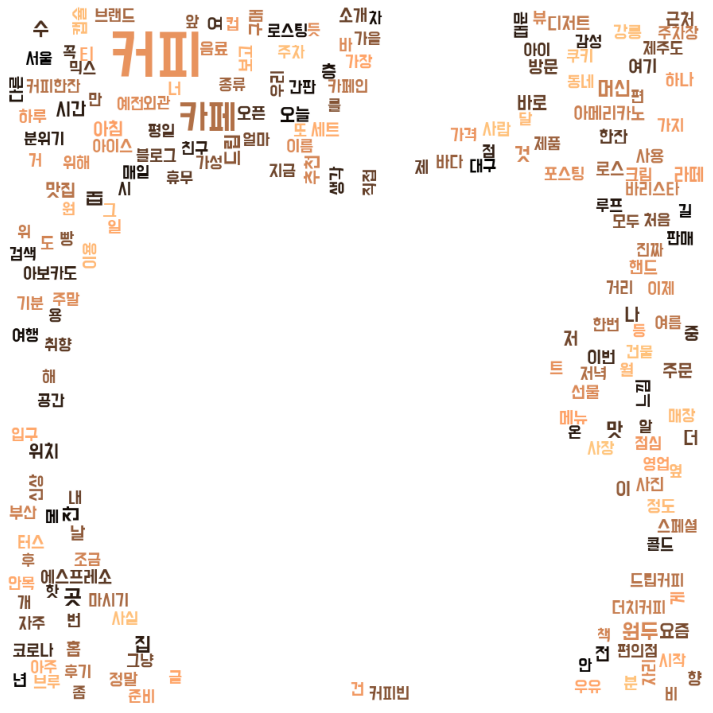

In [72]:

Wordcloud(tresult, '커피블로그', "mask/mask_apple.png")

In [14]:
#주소 뽑아오기

import os
import sys
import urllib.request
import json
import re
import pandas as pd
client_id = "4FdY0qL5azIJ4BXVjUal"
client_secret = "Ylgg4Oh_FN"
search = input('검색어를 입력하세요 : ')

blog_data = pd.DataFrame()

encText = urllib.parse.quote(search)

adress = list()

for i in range(1, 1000, 100):
    try:
        url = "https://openapi.naver.com/v1/search/blog?query=" + encText + '&display=100'+'&sort=sim'+f'&start={i}' # json 결과
        # url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과

        request = urllib.request.Request(url)
        request.add_header("X-Naver-Client-Id",client_id)
        request.add_header("X-Naver-Client-Secret",client_secret)
        response = urllib.request.urlopen(request)
        rescode = response.getcode()

        if(rescode==200):
            response_body = response.read().decode('utf-8')
            response_body1 = json.loads(str(response_body))
            for i in response_body1['items']:
                hangul = re.compile('[^ ㄱ-ㅎ|가-힣]+')
                adress.append(i['link'])
        else:
            print("Error Code:" + rescode)

    except:
        print('Error')

blog_data['adress'] = adress
blog_data.to_csv('data/{0}블로그 주소목록.txt'.format(search), mode='a', header=True, index=True)



검색어를 입력하세요 : 도라에몽


In [38]:
#주소 불러와서 블로그 내용 불러오기

import urllib.request
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import urllib
import json
import re

page = requests.get("https://m.blog.naver.com/p1ayme/222451547696")
html = page.text
soup = BeautifulSoup(html, 'lxml')
data1 = soup.find_all('div', {'class':'se-component-content'})
title = soup.find('span', {'class':'se-fs-fs32 se-ff-nanumsquare'}).text
data3 = soup.find('div', {'class':'se-main-container'}).text
contents = re.sub('[^A-Za-z0-9가-힣- -.]', '', data3)
contents = contents.replace('\r', ' ')


naverblog = [title, contents]
print(naverblog)

['아름다웠던 속초 카페 리스트', '며칠 전 친구들과 강원도 여행을 가서 미리 알아보았던 속초 카페에 다녀왔어요.카페 분위기가 너무 안락하고 오션뷰가 너무 이뻤던 곳이어서 인상깊어 소개해드려요. 1. 카페우디카페 우디강원도 속초시 영랑해안길 163 주소  강원 속초시 영랑해안길 163전화번호  010-2564-5935영업시간  매일 1000 - 2200 이날 방문한 카페우디는 영랑해안길을 따라 차로 5분 정도 거리에 있었어요.외관은 카페이름과 걸맞게 우드톤의 목재로 되어있고 커피 이외에도 다양한 음료를 팔고있어 만족스러웠던 곳이에요. 입구에는 귀여운 나무 그림이 그려진 간판이 자리하고 있었는데요.카페의 컨셉이 확실한 듯 보여서 과연 어떤 매력을 발산할지 기대가 마구 높아졌어요.  테이크아웃 하는 손님을 위해 특별히 20% 할인을 시켜준다 하더라고요.잠깐 들렀다 가야하는 손님들을 생각하는 사장님의 후한 인심을 느낄 수 있었죠. 속초 카페 안쪽으로 들어서니 깔끔하면서도 모던한 느낌이 눈에 확 들어왔어요.화이트와 우드를 조화롭게 섞어서 그런지 한눈에 봐도 쾌적함이 느껴지더라고요. 가족단위 손님이 자주오는 관광지다보니 어린이의자가 따로 준비되어 있었어요.짧은 동선으로 편하게 가져다 쓰실 수 있으니 가족단위 손님에게 유용하게 쓰이고 있더라고요. 유리 안으로 전시되어 있는 베이커리는 하나같이 영롱한 자태를 보이고 있었어요.평소 쉽게 접하지 못하는 재료들로 만들어진 베이커리들이라 맛에 대한 궁금증이 높아지더라고요. 다양한 메뉴 가운데 시원한 맥주도 포함되어 있어 눈길이 가더라고요.저는 차량을 가지고 와서 마시진 못했지만 오션뷰와 함께 즐기는 맥주를 상상하니 저도 모르게 미소가 지어졌답니다. 부착된 메뉴판을 쭉 살펴보니 음료 종류가 굉장히 다향했어요.이곳의 시그니쳐인 라떼 종류는 물론 커피와 에이드까지 맛깔난 음료들이 정말 많더라고요. 예쁜 가게를 쭉 구경하고 있는데 파릇파릇한 화분들이 모여있는 공간에 시선이 머물렀어요.아기자기하면서도 싱그러운 화분이 프레쉬함을 선사해줘 